#Datos para Obj2 Clusterización de Jugadores

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import seaborn as sns
import plotly
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

warnings.filterwarnings('ignore')

In [4]:
rutaArchivo = "D:\WS_ANALITICA_DATOS\sports_prediction\data\data_jugadores.csv"
data_soccer = pd.read_csv(rutaArchivo)
data_soccer.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,227,Robert Lewandowski,34,2862,23,25.939281,7,6.353777,135,36,2,1,F S,Barcelona,23,25.196005,36.746244,9.871429
1,2370,Karim Benzema,24,2056,19,23.952812,3,6.247547,107,48,1,0,F,Real Madrid,12,18.006583,25.885614,8.579490
2,866,Joselu,34,2989,16,15.871624,2,2.095152,93,22,2,0,F S,Espanyol,11,12.155238,13.920118,2.132708
3,2270,Antoine Griezmann,38,2853,15,11.751190,16,15.643586,111,85,2,0,F M S,Atletico Madrid,15,11.751190,30.893706,11.252617
4,2543,Borja Iglesias,35,2406,15,15.634133,3,2.921825,63,22,2,1,F S,Real Betis,10,11.174591,15.961691,3.046393


In [8]:
# Cargar los datos
data_clustering_soccer = data_soccer
data_clustering_soccer.head()

,id,player_name,games,time,goals,xG,assists,xA,shots,key_passes,yellow_cards,red_cards,position,team_title,npg,npxG,xGChain,xGBuildup
0,227,Robert Lewandowski,34,2862,23,25.939281,7,6.353777,135,36,2,1,F S,Barcelona,23,25.196005,36.746244,9.871429
1,2370,Karim Benzema,24,2056,19,23.952812,3,6.247547,107,48,1,0,F,Real Madrid,12,18.006583,25.885614,8.579490
2,866,Joselu,34,2989,16,15.871624,2,2.095152,93,22,2,0,F S,Espanyol,11,12.155238,13.920118,2.132708
3,2270,Antoine Griezmann,38,2853,15,11.751190,16,15.643586,111,85,2,0,F M S,Atletico Madrid,15,11.751190,30.893706,11.252617
4,2543,Borja Iglesias,35,2406,15,15.634133,3,2.921825,63,22,2,1,F S,Real Betis,10,11.174591,15.961691,3.046393


In [9]:
# Seleccionar las características más relevantes para el clustering
features_clustering = ['games', 'time']
X_clustering = data_clustering_soccer[features_clustering]

In [10]:
#### # Escalar los datos
from sklearn.preprocessing import StandardScaler

scaler_clustering = StandardScaler()
X_clustering_scaled = scaler_clustering.fit_transform(X_clustering)

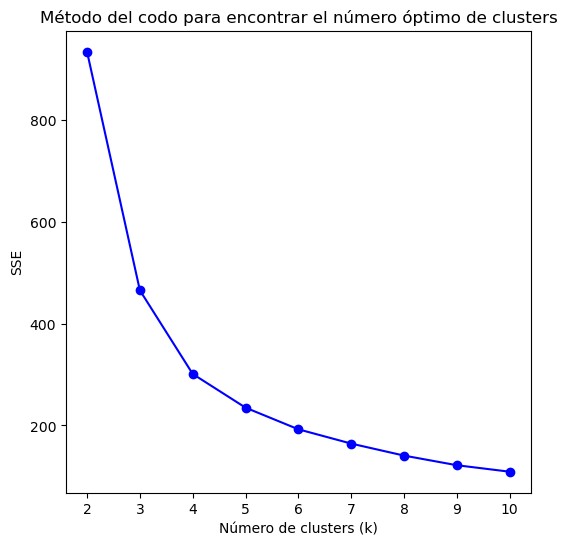

In [11]:
# Método del codo para encontrar el número óptimo de clusters
def metodo_del_codo(datos_prediccion):
    sse = []  # Suma de los errores al cuadrado (Sum of Squared Errors)
    k_range = range(2, 11)  # Evaluar desde 1 hasta 10 clusters

    for k in k_range:
        kmeans = KMeans(n_clusters=k, init='k-means++',max_iter=300, random_state=42)
        kmeans.fit(X_clustering_scaled)
        sse.append(kmeans.inertia_)  # Inertia: suma de las distancias al cuadrado a los centros de los clusters

    # Graficar SSE vs. número de clusters
    plt.figure(figsize=(6, 6))
    plt.plot(k_range, sse, 'bo-')
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('SSE')
    plt.title('Método del codo para encontrar el número óptimo de clusters')
    plt.show()

# Ejecutar el método del codo
metodo_del_codo(data_clustering_soccer)

In [12]:
# Definir una función para entrenar KMeans con diferentes semillas
def fit_kmeans(X, n_clusters, random_state):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, random_state=random_state)
    kmeans.fit(X)
    return kmeans

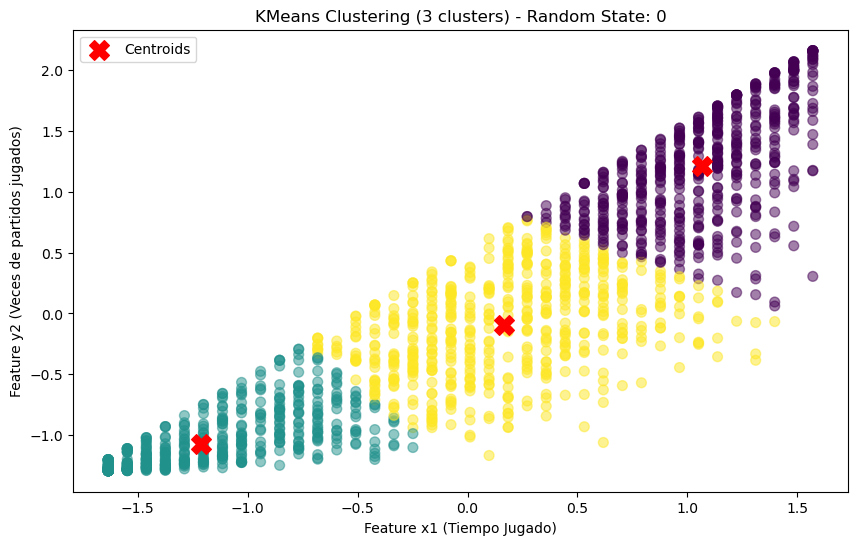

Silhouette Score for random state 0: 0.5374478525986829


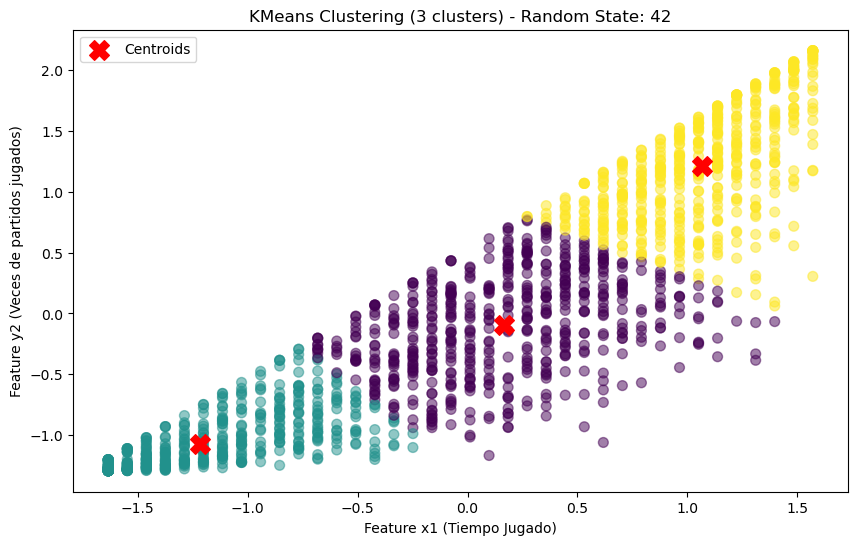

Silhouette Score for random state 42: 0.5376008213112142


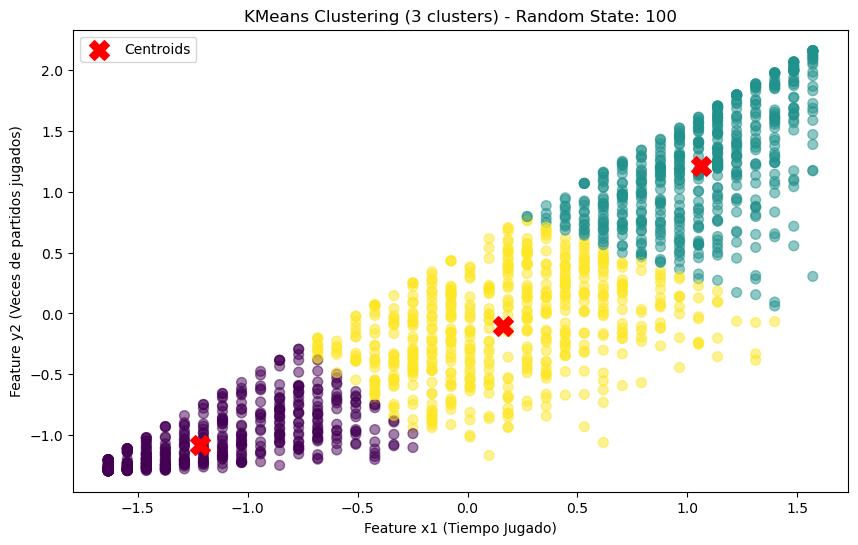

Silhouette Score for random state 100: 0.5377725049555723


In [16]:
# Parámetros para KMeans
n_clusters = 3
seeds = [0, 42, 100]

# Entrenar KMeans con diferentes semillas y visualizar los resultados
for seed in seeds:
    kmeans_model = fit_kmeans(X_clustering_scaled, n_clusters, seed)
    cluster_labels = kmeans_model.labels_
    
    plt.figure(figsize=(10, 6))
    plt.scatter(X_clustering_scaled[:, 0], X_clustering_scaled[:, 1], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)
    plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.xlabel('Feature x1 (Tiempo Jugado)')
    plt.ylabel('Feature y2 (Veces de partidos jugados)')
    plt.title(f'KMeans Clustering (3 clusters) - Random State: {seed}')
    plt.legend()
    plt.show()
    
    # Calcular y mostrar la métrica de Silhouette
    silhouette_avg = silhouette_score(X_clustering_scaled, cluster_labels)
    print(f'Silhouette Score for random state {seed}: {silhouette_avg}')